<a href="https://colab.research.google.com/github/AkramAzid1/Iris-Classification/blob/main/Iris_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT FILE

In [ ]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  df=pd.read_csv(fn)

Saving Iris.csv to Iris.csv


DATA PREVIEW

In [ ]:
print("Full Dataset Preview:")
print(df.head(15))

print("\n Species Count")
print(df['Species'].value_counts())

Full Dataset Preview:
    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0    1            5.1           3.5            1.4           0.2  Iris-setosa
1    2            4.9           3.0            1.4           0.2  Iris-setosa
2    3            4.7           3.2            1.3           0.2  Iris-setosa
3    4            4.6           3.1            1.5           0.2  Iris-setosa
4    5            5.0           3.6            1.4           0.2  Iris-setosa
5    6            5.4           3.9            1.7           0.4  Iris-setosa
6    7            4.6           3.4            1.4           0.3  Iris-setosa
7    8            5.0           3.4            1.5           0.2  Iris-setosa
8    9            4.4           2.9            1.4           0.2  Iris-setosa
9   10            4.9           3.1            1.5           0.1  Iris-setosa
10  11            5.4           3.7            1.5           0.2  Iris-setosa
11  12            4.8           3.4       

DATA CLEANING

In [ ]:
#Drop rows with any missing values
df = df.dropna()

#Remove duplicates if any
df = df.drop_duplicates()

#reset index after cleaning (not mandatory, but cleaner)
df = df.reset_index(drop=True)

#Check if any columns still have NaN (just to be sure)
print("Any missing values left?")
print(df.isnull().sum())

Any missing values left?
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


DATA PREPROCESS

In [ ]:
from sklearn.model_selection import train_test_split

# Drop the 'Id' column if it exists
df = df.drop(columns=['Id'], errors='ignore')

# Features (X) and Target (y)
X = df.drop('Species', axis=1)
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

MODEL TRAINING

In [ ]:
# 📚 Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# 📈 1. Train Logistic Regression
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

# 📈 2. Train Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)

# 📈 3. Train K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)


EVALUATE

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 🔍 Helper function to evaluate and print results
def evaluate_model(name, y_true, y_pred):
    print(f"\n📌 Model: {name}")
    print(f"✅ Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print("\n📋 Classification Report:")
    print(classification_report(y_true, y_pred))
    print("🧱 Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

# Evaluate Logistic Regression
evaluate_model("Logistic Regression", y_test, log_preds)

# Evaluate SVM
evaluate_model("Support Vector Machine (SVM)", y_test, svm_preds)

# Evaluate KNN
evaluate_model("K-Nearest Neighbors (KNN)", y_test, knn_preds)



📌 Model: Logistic Regression
✅ Accuracy: 0.9667

📋 Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

🧱 Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]

📌 Model: Support Vector Machine (SVM)
✅ Accuracy: 0.9667

📋 Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97  

VISUALIZATION

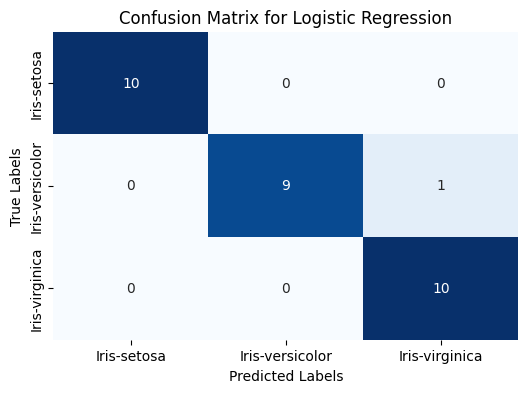

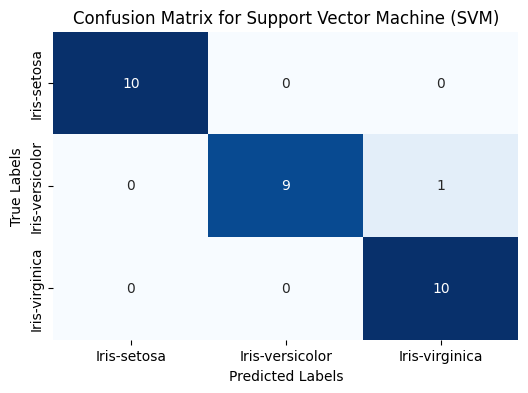

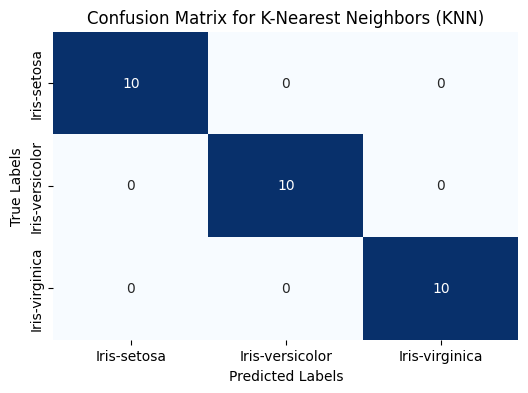

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=sorted(y_true.unique()),
                yticklabels=sorted(y_true.unique()))
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Logistic Regression
plot_confusion_matrix(y_test, log_preds, "Logistic Regression")

# SVM
plot_confusion_matrix(y_test, svm_preds, "Support Vector Machine (SVM)")

# KNN
plot_confusion_matrix(y_test, knn_preds, "K-Nearest Neighbors (KNN)")


VISUALIZATION

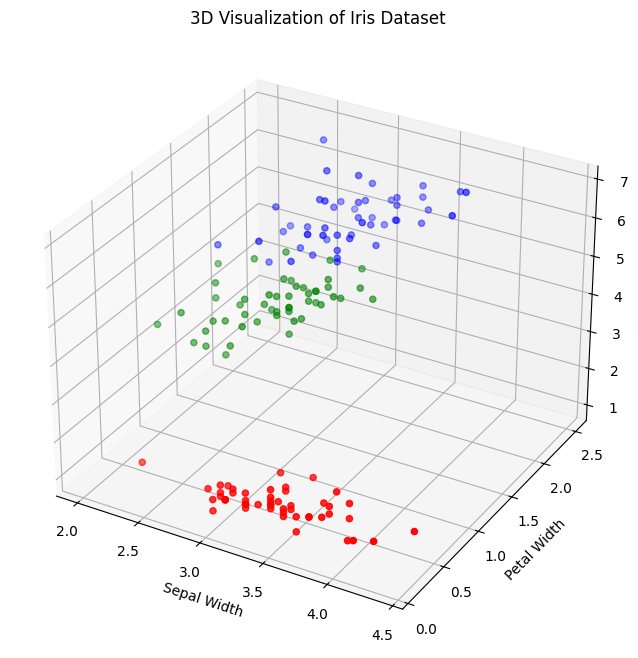

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

species_map = {'Iris-setosa': 'r', 'Iris-versicolor': 'g', 'Iris-virginica': 'b'}
colors = df['Species'].map(species_map)

ax.scatter(df['SepalWidthCm'], df['PetalWidthCm'], df['PetalLengthCm'], c=colors)

ax.set_xlabel('Sepal Width')
ax.set_ylabel('Petal Width')
ax.set_zlabel('Petal Length')
plt.title('3D Visualization of Iris Dataset')
plt.show()


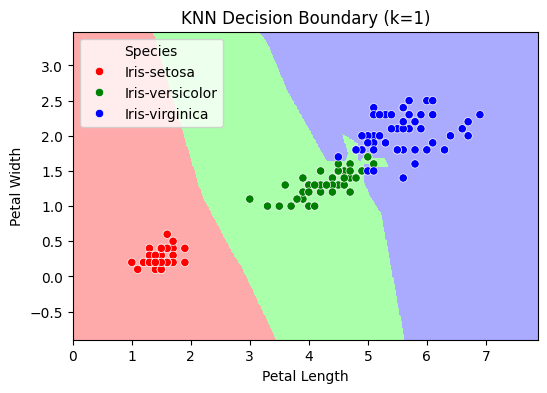

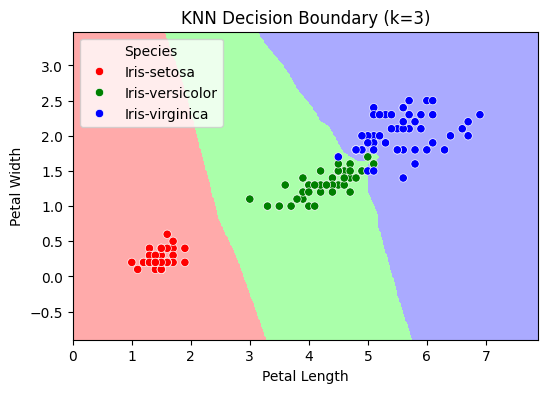

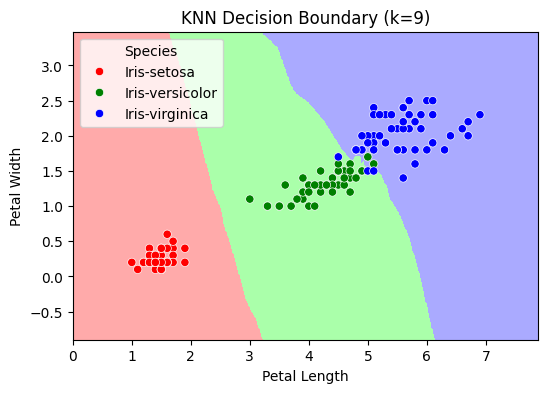

In [ ]:
from matplotlib.colors import ListedColormap
import numpy as np

def plot_knn_decision_boundary(n_neighbors):
    X_knn = df[['PetalLengthCm', 'PetalWidthCm']].values
    y_knn = df['Species'].astype('category').cat.codes.values  # Encode species as 0,1,2

    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_knn, y_knn)

    h = 0.02  # step size in the mesh
    x_min, x_max = X_knn[:, 0].min() - 1, X_knn[:, 0].max() + 1
    y_min, y_max = X_knn[:, 1].min() - 1, X_knn[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ['red', 'green', 'blue']

    plt.figure(figsize=(6,4))
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    sns.scatterplot(x=X_knn[:, 0], y=X_knn[:, 1], hue=df['Species'], palette=cmap_bold)
    plt.xlabel("Petal Length")
    plt.ylabel("Petal Width")
    plt.title(f"KNN Decision Boundary (k={n_neighbors})")
    plt.show()

plot_knn_decision_boundary(1)
plot_knn_decision_boundary(3)
plot_knn_decision_boundary(9)
